## Case Study: Advertising Data Set

In [1]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

# allow plots to appear directly in the notebook
%matplotlib inline
sns.set()

### Read data into a DataFrame

Use pandas.read_csv() to load data into a dataframe. 

The data can be a file on your computer or even a file from an online source.

In [2]:
data=pd.read_csv('Advertising.csv',index_col=0)

What are the input variables?
- TV: advertising dollars spent on TV for a single product in a given market 
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

All above are in thousands of dollars.

What is the target variable?
- Sales: sales of a single product in a given market (in thousands of widgets)

### Exploratory Data Analysis

Show the shape of the DataFrame

In [3]:
data.shape

(200, 4)

Get a high level overview of the data: column name, column types and any potential missing values.

In [4]:
for col, missing_count in data.isna().sum().items():
    if missing_count == 0:
        print(f"{col}: no missing values")
    else:
        print(f"{col}: {missing_count} missing values")


TV: no missing values
Radio: no missing values
Newspaper: no missing values
Sales: no missing values


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


Get a high level summary of each numerical column

In [6]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Any missing values or no illogical values (i.e negative quantities)? If not, this is a clean data set.

### Simple Linear Regression

#### Relationship between Sales and Newspaper spend

$$y = \beta_0 + \beta_1x$$
- $y$ is the target variable, i.e. the sales
- $x$ corresponds to the input variable, i.e. Newspaper spend
- $\beta_0$ is the intercept with the y-axis
- $\beta_1$ is the coefficient for the input variable

Prepare the data for linear regression - only Sales and Newspaper columns

In [7]:
# create x and y
feature_cols = ['Newspaper']
x_orig = data.loc[:,feature_cols].values
# feature_cols must be a list of column names, even if just 1 col
# x for linear regression must be 2D array (x cannot be 1D flat array)
display(x_orig[:5])

y = data.loc[:,"Sales"]
display(y[:5])

array([[69.2],
       [45.1],
       [69.3],
       [58.5],
       [58.4]])

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

#### Use LinearRegression model 

Objective: minimize the **sum of squared residuals (SSR)**
$$
\min~\text{SSR} = \min\sum\limits_{i=1}^nu_i^2 = \min\sum\limits_{i=1}^n(y_i - \hat{y}_i)^2. 
$$

In [8]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [9]:
x_orig.shape

(200, 1)

In [10]:
y.shape

(200,)

In [11]:
# create LinearRegression object and fit
def normal_equation(X, Y):
    #add constant term for X
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    #closed form solution
    coefficients= np.linalg.inv(X.T@X)@(X.T@Y)
    alpha=coefficients[0]
    beta=coefficients[1:][0]
    return alpha,beta

# print the results
normal_equation(x_orig,y)

(12.35140706927817, 0.054693098472273105)

#### Using the Model for Prediction

Let's say that there were 2 new markets where the Newspaper advertising spend was **\$100,000** and **\$200,000**. What would we predict for the Sales in that market?

$$y_1 = 12.3514 + 0.05469 \times 100$$
$$y_2 = 12.3514 + 0.05469 \times 200$$


$$y_1=17.8204$$
$$y_2=23.2894$$

In [12]:
newspaper_spending=np.array([[1,1],[100,200]]).T
newspaper_spending.shape

(2, 2)

In [13]:
np.array(normal_equation(x_orig,y)).reshape(2,1)

array([[12.35140707],
       [ 0.0546931 ]])

In [14]:
sales_spending=newspaper_spending@np.array(normal_equation(x_orig,y))
print(sales_spending)

[17.82071692 23.29002676]


In [15]:
# x must be 2D array with multiple rows and 1 column; x cannot be 1D array


#### How Well Does the Model Fit the data?
Let's feed the original Newspaper column back to the trained linear model to get the predicted y value by the model

In [16]:
y_pred =np.hstack((np.ones((x_orig.shape[0], 1)), x_orig))@np.array(normal_equation(x_orig,y))
y_pred

array([16.13616948, 14.81806581, 16.14163879, 15.55095333, 15.54548402,
       16.45338945, 13.63669488, 12.98584701, 12.40610017, 13.51090076,
       13.67498005, 12.57017946, 15.95568226, 12.74519738, 14.8672896 ,
       15.24467198, 18.5864203 , 15.40328196, 13.35229077, 13.39604525,
       15.27201853, 13.63669488, 15.06418475, 13.78436625, 13.35229077,
       13.41792249, 13.04054011, 13.60387902, 13.60387902, 14.58288549,
       14.71414892, 14.46256067, 13.99220002, 12.367815  , 12.756136  ,
       12.81629841, 12.62487256, 14.85088167, 14.27113483, 14.10158622,
       14.07970898, 14.46802998, 12.44985465, 13.79530487, 14.71961823,
       14.07423967, 14.30395068, 13.36322939, 15.08059268, 14.36411309,
       14.24378828, 12.54830222, 14.51725377, 15.56189195, 13.22102733,
       15.63299298, 14.61570135, 13.2593125 , 14.41333688, 12.86005289,
       13.52183938, 15.34311956, 13.84452866, 12.8108291 , 13.93203762,
       12.40063086, 12.47173189, 12.90927667, 12.95303115, 13.83

In [19]:
from sklearn import metrics

def evaluate_model(Y, Y_pred):

    mse = metrics.mean_squared_error(Y, Y_pred).round(4)
    rmse = np.sqrt(metrics.mean_squared_error(Y, Y_pred)).round(4)
    r2=metrics.r2_score(Y,Y_pred).round(4)
    return mse, rmse,r2

In [20]:
evaluate_model(y,y_pred)

(25.674, 5.067, 0.0521)

Use a plot to check if the prediction (linear model) fits the original data (Newspaper spend vs. Sales) well

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

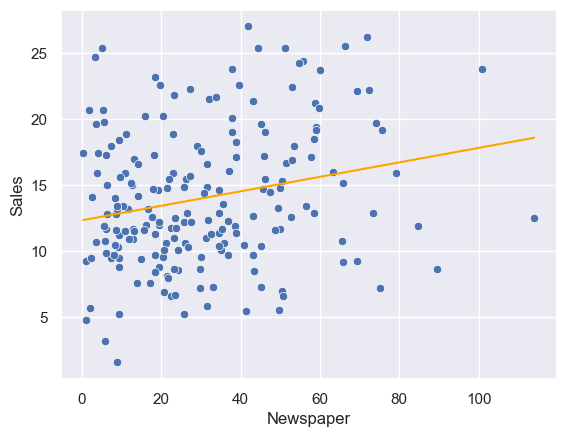

In [21]:
# Plot the original data set on a scatterplot
sns.scatterplot(x=data['Newspaper'], y=y)

# plot the linear fit as a lineplot
sns.lineplot(x=data['Newspaper'], y=y_pred, color="orange")

#### Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) 

In [22]:
mse,rmse,r2=evaluate_model(y,y_pred)
print(mse,rmse)

25.674 5.067


#### R-Squared

$$
  R^2 = 1 - \frac{\sum_i (y_i - \hat{y}_i)^2}{\sum_i (y_i - \bar{y})^2}
  $$



In [23]:
print(r2)

0.0521


### Multiple Linear Regression

Let's now consider all input variables, TV, Newspaper, Radio

In [24]:
data

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [25]:
x_all = data.loc[:,'TV':'Newspaper']
y = data['Sales']
normal_equation(x_all,y)

(2.938889369459396, 0.045764645455397636)

In [26]:
data.loc[:, ['Newspaper','Sales']].corr()

,Newspaper,Sales
Newspaper,1.000000,0.228299
Sales,0.228299,1.000000


### Dealing with categorical variables

In [27]:
data=pd.read_csv('condo.csv')
data.head()

,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date
0,SEASCAPE,4388000,2028,4,CCR,Resale,2164,06 to 10,87.0,Nov-19
1,COMMONWEALTH TOWERS,1300000,1887,3,RCR,Resale,689,16 to 20,93.0,Nov-19
2,THE TRILINQ,1755000,1304,5,OCR,Resale,1346,06 to 10,92.0,Nov-19
3,THE CREST,2085000,2201,3,RCR,Resale,947,01 to 05,92.0,Nov-19
4,THE ANCHORAGE,1848888,1468,3,RCR,Resale,1259,01 to 05,999.0,Nov-19


**_For student’s own exploration_**

Option 1: Use pandas.get_dummies()

In [28]:
type_dummies=pd.get_dummies(data.type)
data = pd.concat([data, type_dummies], axis=1)
data.head()

,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date,New Sale,Resale
0,SEASCAPE,4388000,2028,4,CCR,Resale,2164,06 to 10,87.0,Nov-19,0,1
1,COMMONWEALTH TOWERS,1300000,1887,3,RCR,Resale,689,16 to 20,93.0,Nov-19,0,1
2,THE TRILINQ,1755000,1304,5,OCR,Resale,1346,06 to 10,92.0,Nov-19,0,1
3,THE CREST,2085000,2201,3,RCR,Resale,947,01 to 05,92.0,Nov-19,0,1
4,THE ANCHORAGE,1848888,1468,3,RCR,Resale,1259,01 to 05,999.0,Nov-19,0,1


Option 2: Use scikit-learn OneHotEncoder
    
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [29]:
import sklearn
onehotencoder=sklearn.preprocessing.OneHotEncoder()
encoded_data = onehotencoder.fit_transform(data[['type']]).toarray()
New_Sale, Resale = encoded_data[:, :-1], encoded_data[:, -1]
print(New_Sale.shape,Resale.shape)

(32168, 1) (32168,)


## Case Study: Condo Data Set

### Ordinary Least Square (OLS) model

In [30]:
import statsmodels.formula.api as smf

In [31]:
d5_condo = data.loc[(data['district_code']==5) & 
                    (data['area']<1500) & 
                    (data['remaining_years']<100)]

In [32]:
d5_condo.head()

,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date,New Sale,Resale
2,THE TRILINQ,1755000,1304,5,OCR,Resale,1346,06 to 10,92.0,Nov-19,0,1
6,BLUE HORIZON,990000,1022,5,OCR,Resale,969,21 to 25,80.0,Oct-19,0,1
7,DOVER PARKVIEW,1088000,1162,5,RCR,Resale,936,06 to 10,73.0,Oct-19,0,1
10,WESTCOVE CONDOMINIUM,970000,834,5,OCR,Resale,1163,01 to 05,75.0,Oct-19,0,1
14,FABER CREST,950000,919,5,OCR,Resale,1033,01 to 05,76.0,Oct-19,0,1


#### Categorical variable 'type' with 2 values

In [33]:
d5_model=smf.ols('price~area+type',data=d5_condo)
result = d5_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     3271.
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        02:38:18   Log-Likelihood:                -18424.
No. Observations:                1402   AIC:                         3.685e+04
Df Residuals:                    1399   BIC:                         3.687e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.887e+05   1.17e+04     16.

#### Categorical variable 'segment' with more than 2 values

#### Interaction terms

#### How to treat numbers as categorical variables

In [34]:
small_condo_model = smf.ols('price ~ district_code + area', data=small_condo)
result = small_condo_model.fit()
print(result.summary())

NameError: name 'small_condo' is not defined

## Case Study: Wage Data Set

### OLS with nonlinear terms

In [35]:
wage = pd.read_csv('wage.csv')
wage_female = wage.loc[wage['female']==1]
wage_female.head()

,wage,educ,exper,female,married
0,3.10,11.0,2.0,1.0,0.0
1,3.24,12.0,22.0,1.0,1.0
7,5.00,12.0,5.0,1.0,0.0
8,3.60,12.0,26.0,1.0,0.0
10,6.25,16.0,8.0,1.0,0.0


Can the relationship be fitted to a straight line?

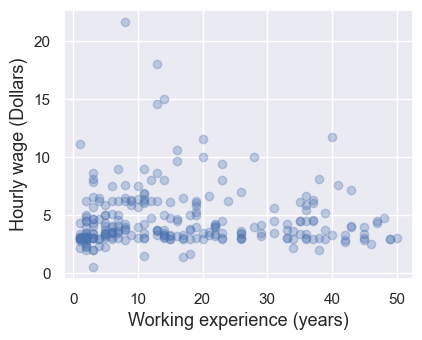

In [36]:
plt.figure(figsize=(4.5, 3.5))
plt.scatter(wage_female['exper'], wage_female['wage'], 
            c='b', alpha=0.3)

plt.xlabel('Working experience (years)', fontsize=13)
plt.ylabel('Hourly wage (Dollars)', fontsize=13)
plt.show()

Let's try Model 1
$$
y_{wage} = \beta_0 + \beta_1 x_{exper}
$$


In [37]:
model1 = smf.ols('wage ~ exper', data=wage_female)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.01564
Date:                Tue, 18 Apr 2023   Prob (F-statistic):              0.901
Time:                        02:39:02   Log-Likelihood:                -590.91
No. Observations:                 252   AIC:                             1186.
Df Residuals:                     250   BIC:                             1193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6117      0.250     18.441      0.0

Let's try Model 2 

$$
y_{wage} = \beta_0 + \beta_1 x_{exper} + \beta_2 \sqrt{x_{exper}}
$$
   

In [38]:
model2 = smf.ols('wage ~ exper + np.sqrt(exper)',
data=wage_female)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     6.850
Date:                Tue, 18 Apr 2023   Prob (F-statistic):            0.00127
Time:                        02:39:03   Log-Likelihood:                -584.17
No. Observations:                 252   AIC:                             1174.
Df Residuals:                     249   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.9159      0.769      2.

Let's try Model 3

$$
log(y_{wage}) = \beta_0 + \beta_1 x_{exper} + \beta_2 \sqrt{x_{exper}}
$$
   

In [39]:
model3 = smf.ols('np.log(wage) ~ exper + np.sqrt(exper)',
data=wage_female)
result2 = model3.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     8.463
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           0.000278
Time:                        02:39:04   Log-Likelihood:                -144.31
No. Observations:                 252   AIC:                             294.6
Df Residuals:                     249   BIC:                             305.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8830      0.134      6.

## Coding exercise

Load insurance.csv first with pd.read_csv()

In [40]:
insurance_data=pd.read_csv('insurance.csv')

Questions for exploration:

- Which variable is the y?
- Which variables are categorical? Which ones are numerical?
- Any interaction terms?
- Any non-linear terms?

In [41]:
insurance_data.head()
#based on the column variables, charge should be the predicted variable while the rest of the columns will be the explainatory variable
#sex, regions and smoker are categorical while bmi, children,age are numerical


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


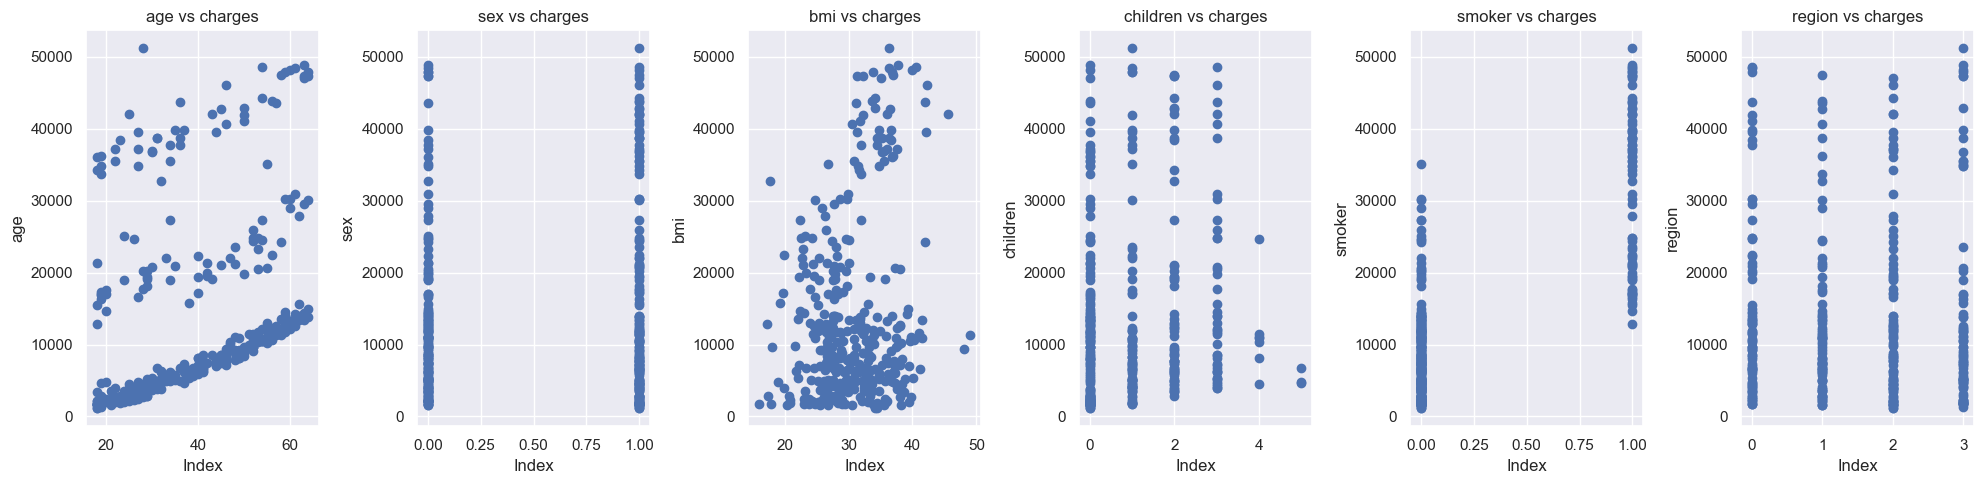

In [42]:
# Create a figure and a grid of subplots
fig, axs = plt.subplots(nrows=1, ncols=len(insurance_data.columns[:-1]), figsize=(20, 5))

# Iterate over the columns of the DataFrame and plot a linear subplot for each column
for i, col in enumerate(insurance_data.columns[:-1]):
    axs[i].scatter(insurance_data[col],insurance_data['charges'])
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel(col)
    axs[i].set_title(f'{col} vs charges')

# Adjust the layout of the subplots and show the figure
fig.tight_layout()
plt.show()

In [43]:
insurance_data[insurance_data.columns[:-1]]

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
343,63,1,36.765,0,0,0
344,49,0,41.470,4,0,2
345,34,0,29.260,3,0,2
346,33,1,35.750,2,0,2


In [44]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats

#non-manual way to create interactive terms
poly = PolynomialFeatures(degree=2, include_bias=False)

#using all the columns except charges to create interactive terms
X_poly = poly.fit_transform(insurance_data[insurance_data.columns[:-1]])

#Generate column names for the new features
feature_names = poly.get_feature_names(input_features=insurance_data[insurance_data.columns[:-1]].columns)

# Convert X_poly to a pandas DataFrame with column names
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
print(X_poly_df.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'age^2', 'age sex',
       'age bmi', 'age children', 'age smoker', 'age region', 'sex^2',
       'sex bmi', 'sex children', 'sex smoker', 'sex region', 'bmi^2',
       'bmi children', 'bmi smoker', 'bmi region', 'children^2',
       'children smoker', 'children region', 'smoker^2', 'smoker region',
       'region^2'],
      dtype='object')


C:\Users\final\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [45]:
#model
model = LinearRegression()
model.fit(X_poly_df, insurance_data['charges'])

# Compute the standard error of the coefficients
mse = mean_squared_error(insurance_data['charges'], model.predict(X_poly_df))
variance = np.linalg.inv(np.dot(X_poly_df.T, X_poly_df)).diagonal()
se = np.sqrt(variance * mse)

# Compute the t-statistics and p-values for the coefficients
t_stats = model.coef_ / se
p_values = 2 * (1 - stats.t.cdf(abs(t_stats), len(y) - X_poly_df.shape[1]))
model_assessment=pd.DataFrame({'Variable': X_poly_df.columns, 't-statistic': t_stats, 'p-value': p_values})

#filtering out statistically significant explanatory  variables
model_assessment[model_assessment['p-value']<0.05]

C:\Users\final\AppData\Local\Temp\ipykernel_23404\3280713869.py:8: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(variance * mse)


,Variable,t-statistic,p-value
3,children,2.654955,0.008672
19,bmi smoker,15.155599,0.000000
